In [67]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import requests
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Cordia New'
plt.rc('axes', unicode_minus=False)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'




# Data cleaning

In [68]:
url_loan = "https://data.go.th/dataset/ee2d5c24-e132-48fa-b7dd-254b281440d7/resource/55c6fc3b-ce11-4f45-8a63-fa5cb9cd67fd/download/2564-2565-66.xlsx"
url_payer = "https://data.go.th/dataset/1f36630a-c9d2-4ee6-86ea-4f7f93af4761/resource/58e64a92-7b1f-4453-bc8e-f7397c5a9606/download/untitled.xlsx"
url_status = "https://data.go.th/dataset/191983d1-3e59-4bf1-8d6d-6f5cb5c54c8f/resource/551865fe-7277-4213-b307-3cd374270441/download/_66.xlsx"

In [69]:
df_loan = pd.read_excel(url_loan)
df_loan

,ปีการศึกษา,ลักษณะการกู้ยืม,ตำบล,อำเภอ,จังหวัด,จำนวนผู้กู้ยืมทั้งหมด,จำนวนผู้กู้ยืมค่าครองชีพ,จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง,จำนวนเงินค่าครองชีพ
0,2564,1,เกาะกลาง,เกาะลันตา,กระบี่,166,166,3098573.0,5142000
1,2564,1,เกาะลันตาน้อย,เกาะลันตา,กระบี่,62,61,1140795.0,1922400
2,2564,1,เกาะลันตาใหญ่,เกาะลันตา,กระบี่,85,85,1609466.0,2618400
3,2564,1,คลองยาง,เกาะลันตา,กระบี่,111,111,2050103.0,3532800
4,2564,1,ศาลาด่าน,เกาะลันตา,กระบี่,58,57,1491128.0,1903200
...,...,...,...,...,...,...,...,...,...
33938,2565,4,โนนสูง,เมืองอุดรธานี,อุดรธานี,1,1,0.0,36000
33939,2565,4,หมากแข้ง,เมืองอุดรธานี,อุดรธานี,1,1,50000.0,18000
33940,2565,4,ป่าอ้อ,ลานสัก,อุทัยธานี,1,1,55000.0,36000
33941,2565,4,สองคอน,โพธิ์ไทร,อุบลราชธานี,1,1,46900.0,36000


In [70]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33943 entries, 0 to 33942
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ปีการศึกษา                                   33943 non-null  int64  
 1   ลักษณะการกู้ยืม                              33943 non-null  int64  
 2   ตำบล                                         33943 non-null  object 
 3   อำเภอ                                        33943 non-null  object 
 4   จังหวัด                                      33943 non-null  object 
 5   จำนวนผู้กู้ยืมทั้งหมด                        33943 non-null  int64  
 6   จำนวนผู้กู้ยืมค่าครองชีพ                     33943 non-null  int64  
 7   จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง  33943 non-null  float64
 8   จำนวนเงินค่าครองชีพ                          33943 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.3+ MB


ข้อมูลผลการกู้ยืมแยกตามพื้นที่ปี 2564 - 2565 ประกอบไปด้วยจำนวนแถว 33,943 rows และจำนวนคอลัมน์ 9 columns

Data type ของคอลัมน์ : 
1. ปีการศึกษา : int64
2. ลักษณะการกู้ยืม : int64
3. ตำบล : object
4. อำเภอ : object
5. จังหวัด : object
6. จำนวนผู้กู้ยืมทั้งหมด : int64 
7. จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง : int64 
8. จำนวนเงินค่าครองชีพ : int64 

ไม่มี null value

ข้อมูลเชิงกลุ่มที่ต้องการการอธิบาย : ลักษณะการกู้ยืม
* 1 หมายถึง ขาดแคลนทุนทรัพย์
* 2 หมายถึง ศึกษาในสาขาวิชาที่เป็นวามต้องการหลัก
* 3 หมายถึง ศึกษาในสาขาวิชาขาดแคลน
* 4 หมายถึง เรียนดี

In [71]:
df_loan['ผลรวมการกู้'] = df_loan['จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง']+df_loan['จำนวนเงินค่าครองชีพ']
df_loan

,ปีการศึกษา,ลักษณะการกู้ยืม,ตำบล,อำเภอ,จังหวัด,จำนวนผู้กู้ยืมทั้งหมด,จำนวนผู้กู้ยืมค่าครองชีพ,จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง,จำนวนเงินค่าครองชีพ,ผลรวมการกู้
0,2564,1,เกาะกลาง,เกาะลันตา,กระบี่,166,166,3098573.0,5142000,8240573.0
1,2564,1,เกาะลันตาน้อย,เกาะลันตา,กระบี่,62,61,1140795.0,1922400,3063195.0
2,2564,1,เกาะลันตาใหญ่,เกาะลันตา,กระบี่,85,85,1609466.0,2618400,4227866.0
3,2564,1,คลองยาง,เกาะลันตา,กระบี่,111,111,2050103.0,3532800,5582903.0
4,2564,1,ศาลาด่าน,เกาะลันตา,กระบี่,58,57,1491128.0,1903200,3394328.0
...,...,...,...,...,...,...,...,...,...,...
33938,2565,4,โนนสูง,เมืองอุดรธานี,อุดรธานี,1,1,0.0,36000,36000.0
33939,2565,4,หมากแข้ง,เมืองอุดรธานี,อุดรธานี,1,1,50000.0,18000,68000.0
33940,2565,4,ป่าอ้อ,ลานสัก,อุทัยธานี,1,1,55000.0,36000,91000.0
33941,2565,4,สองคอน,โพธิ์ไทร,อุบลราชธานี,1,1,46900.0,36000,82900.0


In [72]:
df_loan = df_loan[df_loan['ปีการศึกษา'] != 2564]
df_loan = df_loan.drop(['ลักษณะการกู้ยืม','ตำบล','อำเภอ','ปีการศึกษา'],axis=1)
summed_df_loan = df_loan.groupby('จังหวัด').sum().reset_index()
summed_df_loan

,จังหวัด,จำนวนผู้กู้ยืมทั้งหมด,จำนวนผู้กู้ยืมค่าครองชีพ,จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง,จำนวนเงินค่าครองชีพ,ผลรวมการกู้
0,กระบี่,6694,6545,1.784679e+08,210918000,3.893859e+08
1,กรุงเทพมหานคร,38874,33705,1.600046e+09,1108494000,2.708540e+09
2,กาญจนบุรี,7122,6884,1.712062e+08,219930000,3.911362e+08
3,กาฬสินธุ์,9361,9051,2.276785e+08,288254400,5.159329e+08
4,กำแพงเพชร,7239,6990,1.503932e+08,219867600,3.702608e+08
...,...,...,...,...,...,...
72,เพชรบุรี,3782,3625,1.057043e+08,115837200,2.215415e+08
73,เพชรบูรณ์,10312,10017,2.299356e+08,321106800,5.510424e+08
74,เลย,4245,4065,1.130181e+08,129832800,2.428509e+08
75,แพร่,4737,4598,9.632015e+07,146004000,2.423241e+08


In [73]:
df_payer = pd.read_excel(url_payer)
df_payer

,ปีงบประมาณ,สถานะผู้กู้,ลักษณะการให้กู้ยืม,ตำบล,อำเภอ,จังหวัด,จำนวนผู้กู้,จำนวนเงินกู้
0,2564,อยู่ระหว่างชำระหนี้,1,เกาะกลาง,เกาะลันตา,กระบี่,652,90489519.22
1,2564,อยู่ระหว่างชำระหนี้,1,เกาะลันตาน้อย,เกาะลันตา,กระบี่,389,54205802.67
2,2564,อยู่ระหว่างชำระหนี้,1,เกาะลันตาใหญ่,เกาะลันตา,กระบี่,360,48465675.55
3,2564,อยู่ระหว่างชำระหนี้,1,คลองยาง,เกาะลันตา,กระบี่,401,53147470.16
4,2564,อยู่ระหว่างชำระหนี้,1,ศาลาด่าน,เกาะลันตา,กระบี่,312,46610360.96
...,...,...,...,...,...,...,...,...
58909,2565,อยู่ระหว่างปลอดหนี้,4,โนนหนามแท่ง,เมืองอำนาจเจริญ,อำนาจเจริญ,1,32800.00
58910,2565,อยู่ระหว่างปลอดหนี้,4,โนนสูง,เมืองอุดรธานี,อุดรธานี,1,36000.00
58911,2565,อยู่ระหว่างปลอดหนี้,4,หมากแข้ง,เมืองอุดรธานี,อุดรธานี,1,62500.00
58912,2565,อยู่ระหว่างปลอดหนี้,4,ป่าอ้อ,ลานสัก,อุทัยธานี,1,3000.00


In [74]:
df_payer = df_payer[df_payer['ปีงบประมาณ'] != 2564]
df_payer = df_payer.drop(['ลักษณะการให้กู้ยืม','ตำบล','อำเภอ','ปีงบประมาณ'],axis=1)
df_payer

,สถานะผู้กู้,จังหวัด,จำนวนผู้กู้,จำนวนเงินกู้
29240,อยู่ระหว่างชำระหนี้,กระบี่,658,92033565.22
29241,อยู่ระหว่างชำระหนี้,กระบี่,391,54801093.67
29242,อยู่ระหว่างชำระหนี้,กระบี่,355,47756918.55
29243,อยู่ระหว่างชำระหนี้,กระบี่,414,54755402.16
29244,อยู่ระหว่างชำระหนี้,กระบี่,306,46195512.96
...,...,...,...,...
58909,อยู่ระหว่างปลอดหนี้,อำนาจเจริญ,1,32800.00
58910,อยู่ระหว่างปลอดหนี้,อุดรธานี,1,36000.00
58911,อยู่ระหว่างปลอดหนี้,อุดรธานี,1,62500.00
58912,อยู่ระหว่างปลอดหนี้,อุทัยธานี,1,3000.00


In [75]:
grouped_df_payer = df_payer.groupby(['จังหวัด','สถานะผู้กู้']).sum().reset_index()
grouped_df_payer

,จังหวัด,สถานะผู้กู้,จำนวนผู้กู้,จำนวนเงินกู้
0,กระบี่,อยู่ระหว่างชำระหนี้,24429,3.271592e+09
1,กระบี่,อยู่ระหว่างปลอดหนี้,2908,4.199499e+08
2,กรุงเทพมหานคร,อยู่ระหว่างชำระหนี้,224711,3.666218e+10
3,กรุงเทพมหานคร,อยู่ระหว่างปลอดหนี้,21021,3.876196e+09
4,กาญจนบุรี,อยู่ระหว่างชำระหนี้,40206,5.060806e+09
...,...,...,...,...
149,เลย,อยู่ระหว่างปลอดหนี้,2518,3.744792e+08
150,แพร่,อยู่ระหว่างชำระหนี้,31245,3.799708e+09
151,แพร่,อยู่ระหว่างปลอดหนี้,2540,3.890179e+08
152,แม่ฮ่องสอน,อยู่ระหว่างชำระหนี้,14640,1.730730e+09


In [76]:
summed_df_payer = grouped_df_payer.groupby('สถานะผู้กู้')['จำนวนผู้กู้'].sum().reset_index()
summed_df_payer

,สถานะผู้กู้,จำนวนผู้กู้
0,อยู่ระหว่างชำระหนี้,3546218
1,อยู่ระหว่างปลอดหนี้,346014


In [77]:
df_status = pd.read_excel(url_status)
df_status

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท)
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00


# Data analysis

In [78]:
summed_df_loan

,จังหวัด,จำนวนผู้กู้ยืมทั้งหมด,จำนวนผู้กู้ยืมค่าครองชีพ,จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง,จำนวนเงินค่าครองชีพ,ผลรวมการกู้
0,กระบี่,6694,6545,1.784679e+08,210918000,3.893859e+08
1,กรุงเทพมหานคร,38874,33705,1.600046e+09,1108494000,2.708540e+09
2,กาญจนบุรี,7122,6884,1.712062e+08,219930000,3.911362e+08
3,กาฬสินธุ์,9361,9051,2.276785e+08,288254400,5.159329e+08
4,กำแพงเพชร,7239,6990,1.503932e+08,219867600,3.702608e+08
...,...,...,...,...,...,...
72,เพชรบุรี,3782,3625,1.057043e+08,115837200,2.215415e+08
73,เพชรบูรณ์,10312,10017,2.299356e+08,321106800,5.510424e+08
74,เลย,4245,4065,1.130181e+08,129832800,2.428509e+08
75,แพร่,4737,4598,9.632015e+07,146004000,2.423241e+08


Text(0.5, 1.0, 'ฮิสโตแกรมแสดงความถี่ของผู้กู้ยืม กยศ. แยกตามจังหวัด')

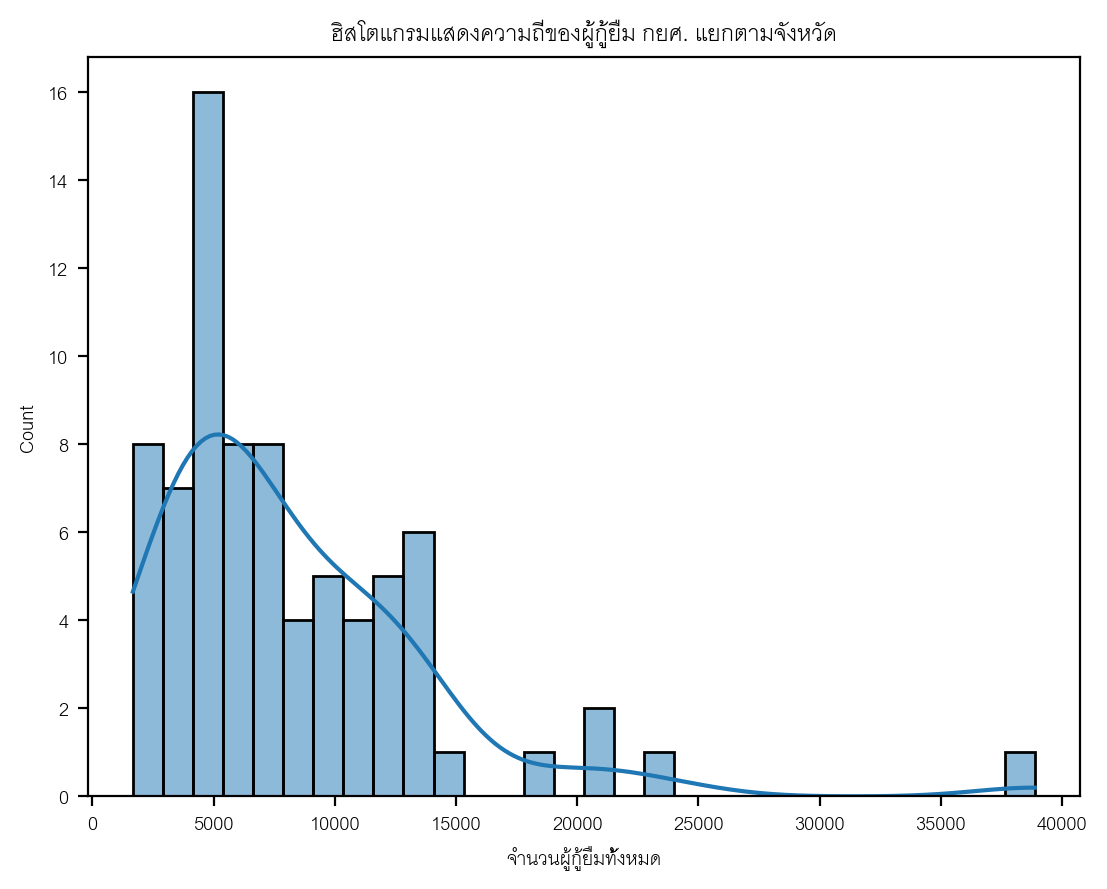

In [79]:
fig1 = sns.histplot(data=summed_df_loan, x="จำนวนผู้กู้ยืมทั้งหมด",kde=True,bins=30)
fig1.set_title('ฮิสโตแกรมแสดงความถี่ของผู้กู้ยืม กยศ. แยกตามจังหวัด')

Text(0.5, 1.0, 'ฮิสโตแกรมแสดงความถี่ของผลรวมการกู้ กยศ. แยกตามจังหวัด ()')

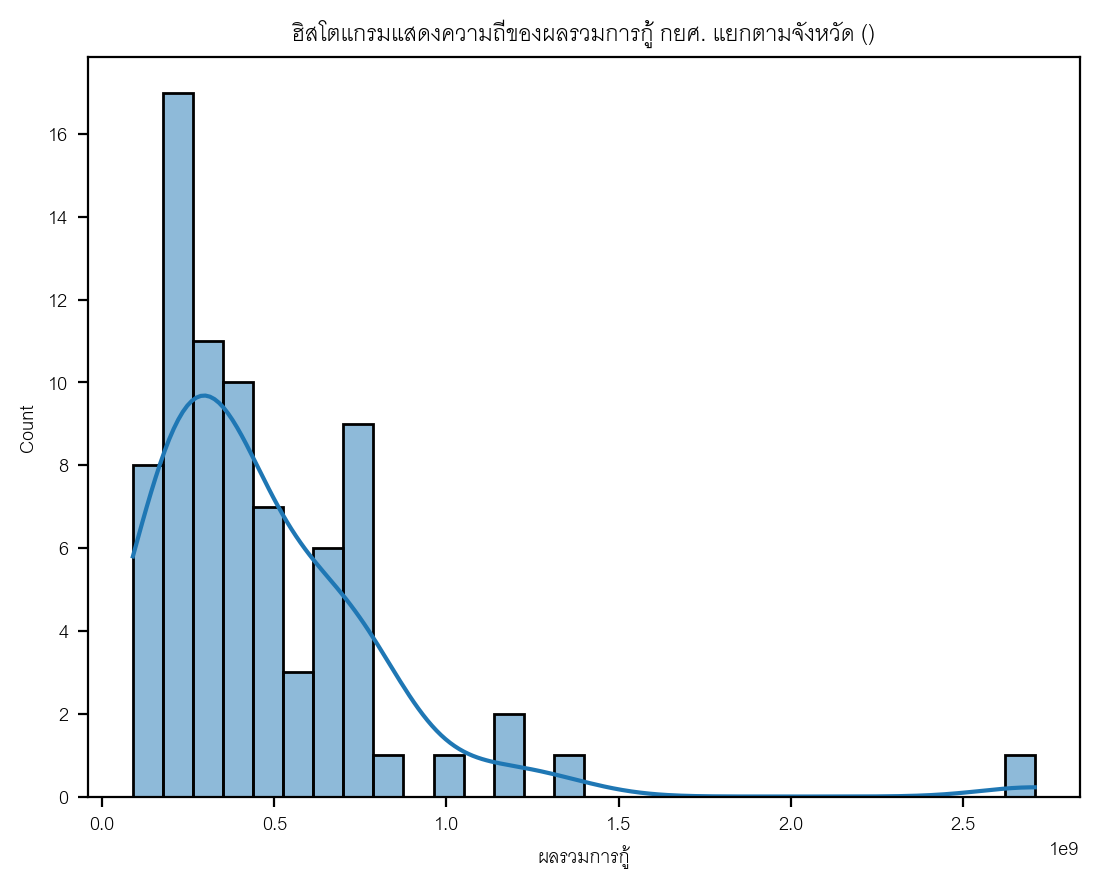

In [80]:
fig2 = sns.histplot(data=summed_df_loan, x="ผลรวมการกู้", kde=True, bins=30,)
fig2.set_title('ฮิสโตแกรมแสดงความถี่ของผลรวมการกู้ กยศ. แยกตามจังหวัด ()')


In [81]:
summed_df_loan.min()

จังหวัด                                            กระบี่
จำนวนผู้กู้ยืมทั้งหมด                                1667
จำนวนผู้กู้ยืมค่าครองชีพ                             1602
จำนวนเงินค่าเล่าเรียนค่าใช้จ่ายเกี่ยวเนื่อง    38255690.0
จำนวนเงินค่าครองชีพ                              50971200
ผลรวมการกู้                                    89226890.0
dtype: object

In [82]:
grouped_df_payer

,จังหวัด,สถานะผู้กู้,จำนวนผู้กู้,จำนวนเงินกู้
0,กระบี่,อยู่ระหว่างชำระหนี้,24429,3.271592e+09
1,กระบี่,อยู่ระหว่างปลอดหนี้,2908,4.199499e+08
2,กรุงเทพมหานคร,อยู่ระหว่างชำระหนี้,224711,3.666218e+10
3,กรุงเทพมหานคร,อยู่ระหว่างปลอดหนี้,21021,3.876196e+09
4,กาญจนบุรี,อยู่ระหว่างชำระหนี้,40206,5.060806e+09
...,...,...,...,...
149,เลย,อยู่ระหว่างปลอดหนี้,2518,3.744792e+08
150,แพร่,อยู่ระหว่างชำระหนี้,31245,3.799708e+09
151,แพร่,อยู่ระหว่างปลอดหนี้,2540,3.890179e+08
152,แม่ฮ่องสอน,อยู่ระหว่างชำระหนี้,14640,1.730730e+09


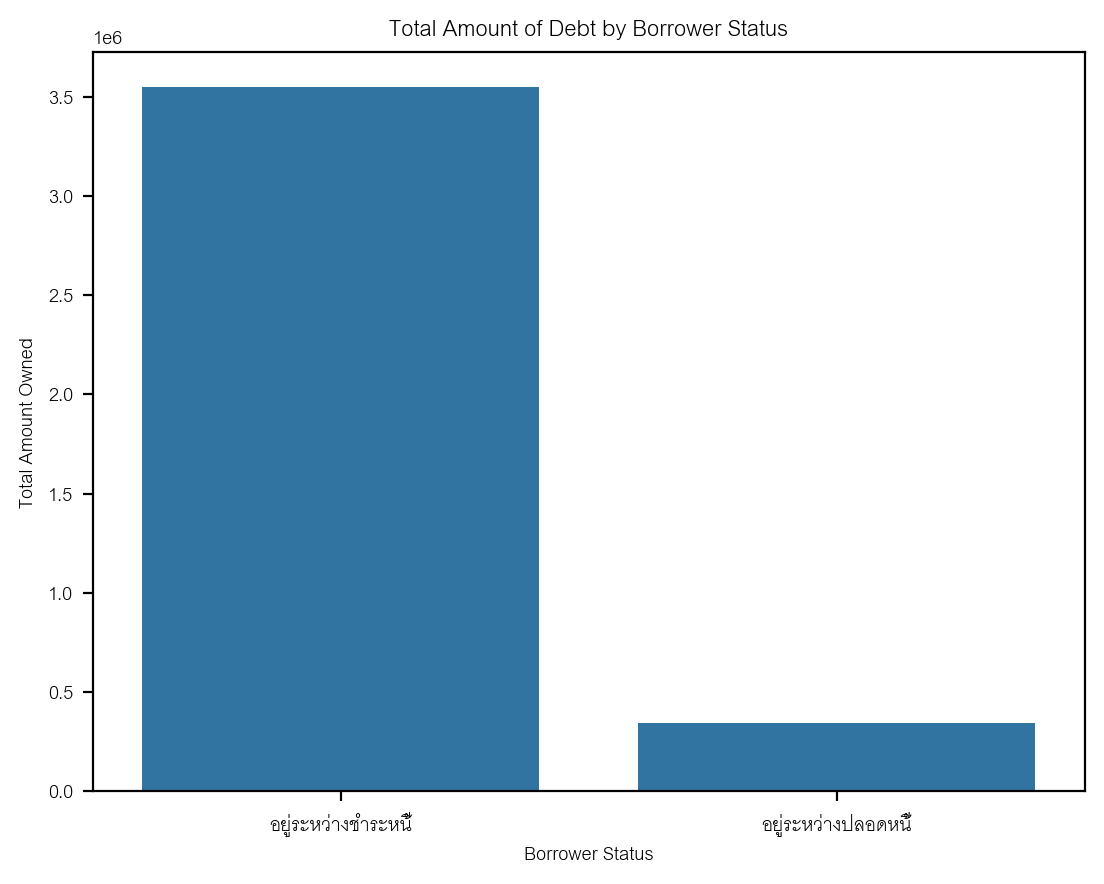

In [83]:
sns.barplot(data = summed_df_payer,x='สถานะผู้กู้',y='จำนวนผู้กู้')
plt.title('Total Amount of Debt by Borrower Status')
plt.xlabel('Borrower Status')
plt.ylabel('Total Amount Owned')

plt.show()

In [84]:
def update_display(selected_province):
    # Filter the DataFrame for the selected province
    filtered_df = grouped_df_payer[grouped_df_payer['จังหวัด'] == selected_province]
    
    # Group by 'status' and sum 'amount_owned'
    grouped_df = filtered_df.groupby('สถานะผู้กู้')['จำนวนผู้กู้'].sum().reset_index()
    
    # Display the DataFrame
    display(grouped_df)

# Create a dropdown for province selection
province_dropdown = widgets.Dropdown(
    options=grouped_df_payer['จังหวัด'].unique(),
    description='Province:',
    disabled=False,
)

# Display the dropdown and update the display function upon selection
widgets.interactive(update_display, selected_province=province_dropdown)

interactive(children=(Dropdown(description='Province:', options=('กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬส…

In [88]:
def update_plot(selected_province):
    # Filter the DataFrame for the selected province
    filtered_df = grouped_df_payer[grouped_df_payer['จังหวัด'] == selected_province]
    
    # Group by 'สถานะผู้กู้' and sum 'จำนวนผู้กู้'
    grouped_df = filtered_df.groupby('สถานะผู้กู้')['จำนวนผู้กู้'].sum().reset_index()
    
    # # Clear previous output (if any)
    # clear_output(wait=True)
    # display(province_dropdown)  # Display the dropdown again
    
    # Display the summarized DataFrame
    display(grouped_df)
    
    # Plotting
    sns.barplot(x='สถานะผู้กู้', y='จำนวนผู้กู้', data=grouped_df)
    plt.title(f'Total Debt by Status in {selected_province}')
    plt.xlabel('Borrower Status')
    plt.ylabel('Total Number of Borrowers')
    plt.show()

# Create a dropdown for province selection
province_dropdown = widgets.Dropdown(
    options=grouped_df_payer['จังหวัด'].unique(),
    description='Province:',
    disabled=False,
)

# Display the dropdown and update the plot function upon selection
widgets.interactive(update_plot, selected_province=province_dropdown)


interactive(children=(Dropdown(description='Province:', options=('กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬส…

In [89]:
def update_plot(selected_province):
    # Filter the DataFrame for the selected province
    filtered_df = grouped_df_payer[grouped_df_payer['จังหวัด'] == selected_province]
    
    # Prepare the first plot data: Group by 'สถานะผู้กู้' and sum 'จำนวนผู้กู้'
    borrowers_df = filtered_df.groupby('สถานะผู้กู้')['จำนวนผู้กู้'].sum().reset_index()
    
    # Prepare the second plot data: Group by 'สถานะผู้กู้' and sum 'จำนวนเงินกู้'
    amount_owned_df = filtered_df.groupby('สถานะผู้กู้')['จำนวนเงินกู้'].sum().reset_index()
    
    # # Clear previous output (if any)
    # clear_output(wait=True)
    # display(province_dropdown)  # Display the dropdown again
    
    # Setup the figure for two subplots
    plt.figure(figsize=(14, 6))
    
    # First plot for number of borrowers
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    sns.barplot(x='สถานะผู้กู้', y='จำนวนผู้กู้', data=borrowers_df)
    plt.title(f'Number of Borrowers in {selected_province}')
    plt.xlabel('Borrower Status')
    plt.ylabel('Total Number of Borrowers')
    
    # Second plot for amount owned
    plt.subplot(1, 2, 2)
    sns.barplot(x='สถานะผู้กู้', y='จำนวนเงินกู้', data=amount_owned_df)
    plt.title(f'Total Amount Owned in {selected_province}')
    plt.xlabel('Borrower Status')
    plt.ylabel('Total Amount Owned')
    
    plt.tight_layout()
    plt.show()
    # Create a dropdown for province selection
province_dropdown = widgets.Dropdown(
    options=grouped_df_payer['จังหวัด'].unique(),
    description='Province:',
    disabled=False,
)

# Display the dropdown and update the plot function upon selection
widgets.interactive(update_plot, selected_province=province_dropdown)

interactive(children=(Dropdown(description='Province:', options=('กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬส…

In [90]:
df_status

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท)
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00


In [ ]:
df_status = df_status